In [1]:
import sys
if sys.platform == "darwin":  # michael's config
    # because Michael is using jupyter lab
    %load_ext lab_black
else:  # zade's config
    # because Zade is using jupyter notebook
    %load_ext nb_black

## Tasks

I have put several more utility functions into the coverage_utils module, have a look at all of them to understand what they do.

Next tasks are:

* [ ] Run below processing by intelligently define the list of obsids so that we can compare regions and years correctly.
* [ ] Use planet4.stats.define_martian_year to get a martian year column into the fans and blotches dataframes instead of below hack.
* [ ] Use proper regions to define the obsid lists that we run the analysis over.
* [ ] End up with a nice function that takes a region name and a year (and best a matplotlib axis for overplotting) as parameters and returns the fractions over Ls plot 


In [2]:
obsid = "ESP_011341_0980"

In [12]:
from coverage_utils import get_obsid_fraction
from my_io import get_tilecoords, get_metadata

In [4]:
get_obsid_fraction(obsid)

0.10205218017100658

In [6]:
tile_coords = get_tilecoords()

I'm simply taking all data with target code "0950" here, just for a quick trial. As discussed, this is dirty and doesn't cleanly define a region of interest due to the longitude ambiguity.

In [10]:
obsids = sorted(
    [obsid for obsid in tile_coords.obsid.unique() if obsid.endswith("_0950")]
)

In [11]:
obsids

['ESP_011348_0950',
 'ESP_011447_0950',
 'ESP_011448_0950',
 'ESP_011777_0950',
 'ESP_011843_0950',
 'ESP_011921_0950',
 'ESP_012212_0950',
 'ESP_012265_0950',
 'ESP_012344_0950',
 'ESP_012693_0950',
 'ESP_012753_0950',
 'ESP_012838_0950',
 'ESP_012845_0950',
 'ESP_013049_0950',
 'ESP_013260_0950',
 'ESP_020146_0950',
 'ESP_020150_0950',
 'ESP_020357_0950',
 'ESP_020401_0950',
 'ESP_020476_0950',
 'ESP_020480_0950',
 'ESP_020568_0950',
 'ESP_020779_0950',
 'ESP_020783_0950',
 'ESP_020902_0950',
 'ESP_021482_0950',
 'ESP_021491_0950',
 'ESP_022193_0950',
 'ESP_022273_0950']

In [13]:
bucket = []
for obsid in obsids:
    d = {}
    d["obsid"] = obsid
    d["fraction"] = get_obsid_fraction(obsid)
    bucket.append(d)
    print(d)

{'obsid': 'ESP_011348_0950', 'fraction': 0.003737329536418643}
{'obsid': 'ESP_011447_0950', 'fraction': 0.041359093357471725}
{'obsid': 'ESP_011448_0950', 'fraction': 0.062094548213948504}
{'obsid': 'ESP_011777_0950', 'fraction': 0.04458526378422526}
{'obsid': 'ESP_011843_0950', 'fraction': 0.056865563597151364}
{'obsid': 'ESP_011921_0950', 'fraction': 0.0564334971713944}
{'obsid': 'ESP_012212_0950', 'fraction': 0.01411541202669451}
{'obsid': 'ESP_012265_0950', 'fraction': 0.03839396949506925}
{'obsid': 'ESP_012344_0950', 'fraction': 0.029097184029313234}
{'obsid': 'ESP_012693_0950', 'fraction': 0.017176204078324875}
{'obsid': 'ESP_012753_0950', 'fraction': 0.05763155793764266}
{'obsid': 'ESP_012838_0950', 'fraction': 0.012259373085597764}
{'obsid': 'ESP_012845_0950', 'fraction': 0.07726019112593872}
{'obsid': 'ESP_013049_0950', 'fraction': 0.03057190733124561}
{'obsid': 'ESP_013260_0950', 'fraction': 0.030315355145342372}
{'obsid': 'ESP_020146_0950', 'fraction': 0.11927833929234007}
{

In [14]:
df = pd.DataFrame(bucket)

In [15]:
df

,fraction,obsid
0,0.003737,ESP_011348_0950
1,0.041359,ESP_011447_0950
2,0.062095,ESP_011448_0950
3,0.044585,ESP_011777_0950
4,0.056866,ESP_011843_0950
5,0.056433,ESP_011921_0950
6,0.014115,ESP_012212_0950
7,0.038394,ESP_012265_0950
8,0.029097,ESP_012344_0950
9,0.017176,ESP_012693_0950


In [16]:
metadata = get_metadata()

In [17]:
metadata.columns

Index(['OBSERVATION_ID', 'IMAGE_CENTER_LATITUDE', 'IMAGE_CENTER_LONGITUDE',
       'SOLAR_LONGITUDE', 'START_TIME', 'map_scale', 'north_azimuth',
       '# of tiles'],
      dtype='object')

In [18]:
def get_Ls(obsid):
    metadata = get_metadata()
    metadata.set_index("OBSERVATION_ID", inplace=True)
    return metadata.at[obsid, "SOLAR_LONGITUDE"]

In [19]:
df["Ls"] = df.obsid.map(get_Ls)

In [20]:
def define_martian_year(obsid):
    return 29 if obsid.startswith("ESP_01") else 30

In [21]:
df["year"] = df.obsid.map(define_martian_year)

Text(0.5, 1.0, 'target_code 0950')

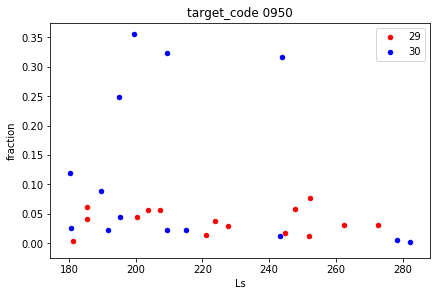

In [22]:
fig, ax = plt.subplots()

for c, year in zip(["red", "blue"], df.year.unique()):
    df.query("year == @year").plot(
        kind="scatter", x="Ls", y="fraction", label=year, ax=ax, color=c
    )
ax.set_title("target_code 0950")